In [4]:
# Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
scipy: 1.10.1
numpy: 1.22.4
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


In [5]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [7]:
# Preprocess the data
df.replace('?',-99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


<ipython-input-7-d9db8e418cb8>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'], 1, inplace=True)


In [8]:
# Let explore the dataset and do a few visualizations
print(df.loc[10])

# Print the shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [9]:
# Describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


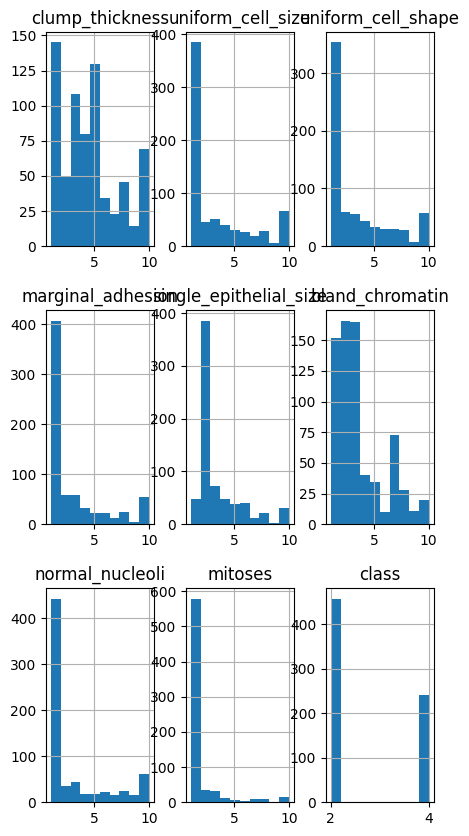

In [11]:
# Plot histograms for each variable
df.hist(figsize = (5, 10))
plt.show()

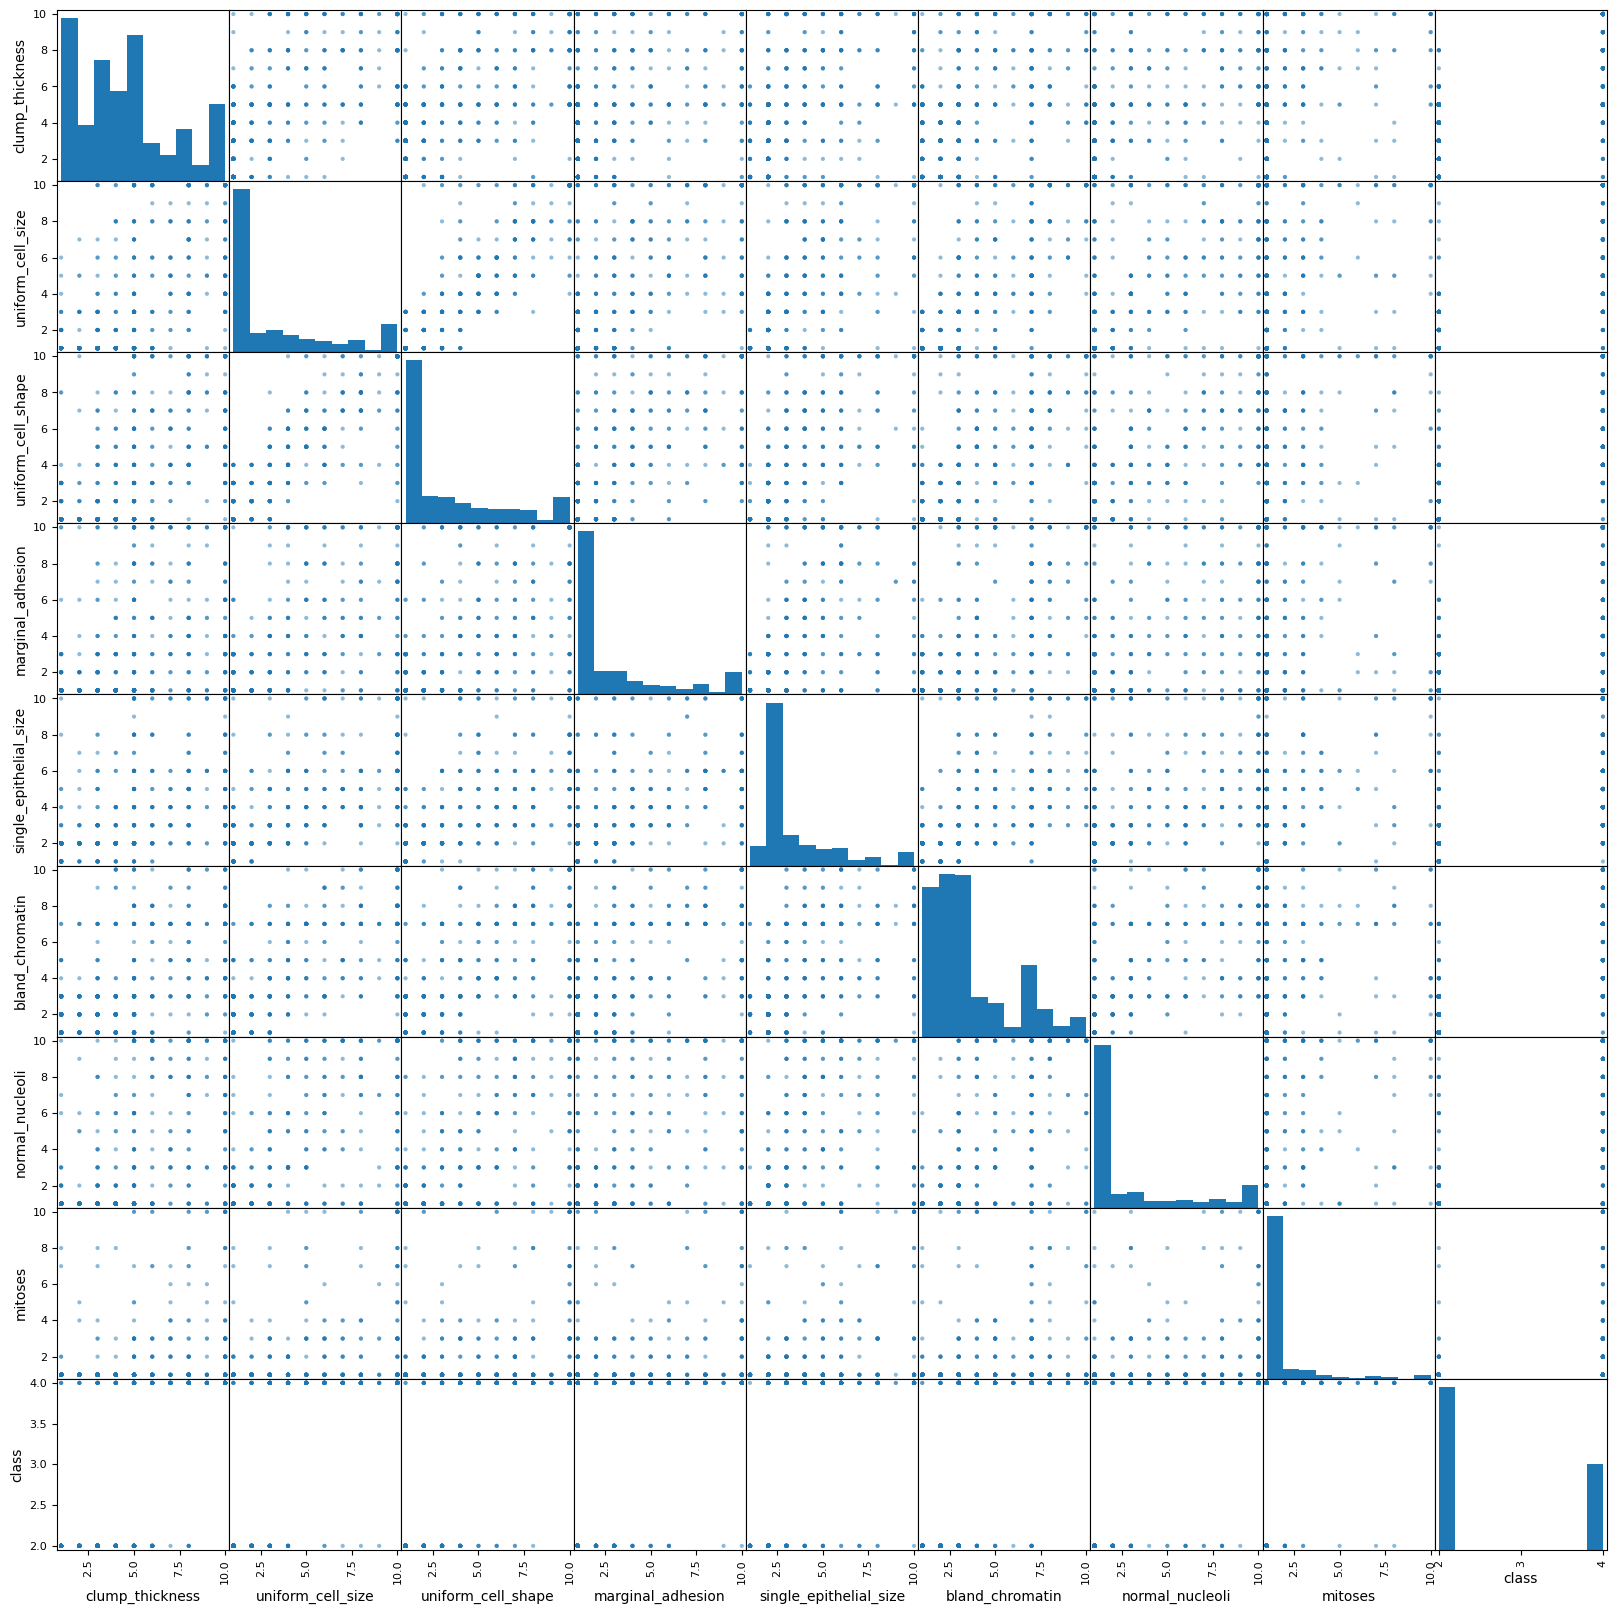

In [12]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (20,20))
plt.show()

In [13]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<ipython-input-13-7d55bc2ba08d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['class'], 1))


In [14]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [17]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false

KNN
0.9357142857142857
              precision    recall  f1-score   support

           2       0.91      0.97      0.94        75
           4       0.97      0.89      0.93        65

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140

SVM
0.5357142857142857
              precision    recall  f1-score   support

           2       0.54      1.00      0.70        75
           4       0.00      0.00      0.00        65

    accuracy                           0.54       140
   macro avg       0.27      0.50      0.35       140
weighted avg       0.29      0.54      0.37       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.5357142857142857
[2]
